#### Note whenever we resample Lumber data, it changes the order of the series so we use .pct_change(1) instead of pct_change(-1) that we use for lumber_df

In [1]:
path = 'F:/Traders/2x4/Adjusted CME Futures/Switch_OI'

In [2]:
import pandas as pd 
from scipy.stats import spearmanr
from datetime import datetime
import numpy as np
import datetime
from os import listdir
from matplotlib import pyplot as plt
from os.path import isfile, join
files = [f for f in listdir(path) if isfile(join(path, f))]

Adj_close           
close               
close	Adj_close	open	Adj_open	high	Adj_high	low	Adj_low	volume	openInterest


In [3]:
f = 'Lumber.csv'
full_name = str(path+'/'+f)
lumber_df = pd.DataFrame(pd.read_csv(full_name,index_col=0))
lumber_df.head()

,close,Adj_close,open,Adj_open,high,Adj_high,low,Adj_low,volume,openInterest
dt,,,,,,,,,,
2022-05-10,1022.0,1022.0,1008.0,1008.0,1025.0,1025.0,1008.0,1008.0,53.0,0.0
2022-05-09,1009.0,1009.0,1000.1,1000.1,1015.0,1015.0,975.0,975.0,89.0,163.0
2022-05-06,1000.1,1000.1,990.0,990.0,1005.0,1005.0,985.0,985.0,147.0,237.0
2022-05-05,1020.0,1020.0,1010.0,1010.0,1033.4,1033.4,993.8,993.8,131.0,340.0
2022-05-04,1010.0,1010.0,1021.6,1021.6,1025.5,1025.5,980.0,980.0,144.0,443.0


### Daily Lumber data - resampled to Weekly data - note to change to any particular day, you change "W" to "W-MON" ETC. "W" is for SUN

In [4]:
weekly_resampled_lumber = pd.DataFrame(index= pd.DatetimeIndex(lumber_df.index),data= lumber_df.values, columns=lumber_df.columns ).resample('W').mean()
weekly_resampled_lumber.head(1).append(weekly_resampled_lumber.tail(1))

C:\Users\Fanjum_cwp\AppData\Local\Temp\2\ipykernel_22224\2150838503.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  weekly_resampled_lumber.head(1).append(weekly_resampled_lumber.tail(1))


,close,Adj_close,open,Adj_open,high,Adj_high,low,Adj_low,volume,openInterest
dt,,,,,,,,,,
1969-10-05,80.166667,17348.436923,79.416667,17186.133459,80.25,17366.470641,79.166667,17132.032305,0.0,0.0
2022-05-15,1015.500000,1015.500000,1004.050000,1004.050000,1020.00,1020.000000,991.500000,991.500000,71.0,81.5


### Daily Lumber Data Resampled to Monthly - MONTH START  - used ('MS)

In [5]:
monthly_resampled_lumber = pd.DataFrame(index= pd.DatetimeIndex(lumber_df.index),data= lumber_df.values, columns=lumber_df.columns ).resample('MS').mean()
monthly_resampled_lumber.head(1).append(monthly_resampled_lumber.tail(1))

C:\Users\Fanjum_cwp\AppData\Local\Temp\2\ipykernel_22224\3846110995.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  monthly_resampled_lumber.head(1).append(monthly_resampled_lumber.tail(1))


,close,Adj_close,open,Adj_open,high,Adj_high,low,Adj_low,volume,openInterest
dt,,,,,,,,,,
1969-10-01,83.510870,18072.137876,83.260870,18018.036721,83.793478,18133.295703,82.98913,17959.231118,0.000000,0.000000
2022-05-01,1019.328571,1019.328571,1014.228571,1014.228571,1028.985714,1028.985714,998.40000,998.400000,108.285714,329.714286


### Daily Lumber Data Resampled to Monthly - MONTH END  - used ('M)

In [6]:
monthly_resampled_lumber_end = pd.DataFrame(index= pd.DatetimeIndex(lumber_df.index),data= lumber_df.values, columns=lumber_df.columns ).resample('M').mean()
monthly_resampled_lumber_end.head(1).append(monthly_resampled_lumber_end.tail(1))

C:\Users\Fanjum_cwp\AppData\Local\Temp\2\ipykernel_22224\289172836.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  monthly_resampled_lumber_end.head(1).append(monthly_resampled_lumber_end.tail(1))


,close,Adj_close,open,Adj_open,high,Adj_high,low,Adj_low,volume,openInterest
dt,,,,,,,,,,
1969-10-31,83.510870,18072.137876,83.260870,18018.036721,83.793478,18133.295703,82.98913,17959.231118,0.000000,0.000000
2022-05-31,1019.328571,1019.328571,1014.228571,1014.228571,1028.985714,1028.985714,998.40000,998.400000,108.285714,329.714286


# BARCHART Futures Data - Transformed & Unadjusted

In [7]:
# CODE TO GET ALL DATA FROM csv files
col_name = 'Adj_close'
futures_df = pd.DataFrame(index=lumber_df.index)
for f in files:
    full_name = str(path+'/'+f)    
    df = pd.DataFrame(pd.read_csv(full_name,index_col=0)[col_name])
    name = f[:f.rfind('.')]
    df = df.rename(columns={col_name: name})    
    futures_df = pd.concat([futures_df,df],axis=1).reindex(futures_df.index)

In [8]:
futures_df.head(3)

,1-Month Eurodollar,1-Month SOFR,13-Week T-Bill Rate,3-Month BSBY,3-Month Eurodollar,3-Month SOFR,3.5% Fuel Oil Barges FOB Rdam (Platts) Crack Spread (1000mt) Futures,3.5% Fuel Oil Barges FOB Rdam (Platts) Crack Spread Futures,Adjusted Interest Rate S&P 500 Total Return Index Futures,AEP-Dayton Hub Daily Electricity Futures - Peak,...,Up-Down Gulf Coast ULSD vs. NYMEX HO Spread Swap (Platts),USD_CHF Micro,USD_CNH Micro,USD_JPY Micro,USD_offshore RMB,USD_ZAR,Western Canadian Select Oil (NE2) Monthly Index Futures,WTI Houston (Argus) vs. WTI Financial Futures,WTI Houston (Argus) vs. WTI Trade Month Futures,WTI Midland (Argus) vs. WTI Trade Month Futures
dt,,,,,,,,,,,,,,,,,,,,,
2022-05-10,99.085000,99.2825,NaN,98.2450,98.5250,99.4900,-14.925,-14.925,8410.72,95.0,...,0.0216,0.9938,6.7524,130.28,6.752400,16.1486,-12.816,1.64,1.40,1.03
2022-05-09,98.570000,99.2775,NaN,98.2775,98.5275,99.4925,-15.141,-15.141,8389.37,112.5,...,0.0196,0.9913,6.7552,130.17,6.767300,16.2206,-13.071,1.63,1.40,0.97
2022-05-06,98.550101,99.2775,NaN,98.2650,98.5025,99.4925,-14.781,-14.781,8667.09,112.5,...,0.0219,0.9864,6.7151,130.45,6.727128,16.0321,-12.816,1.62,1.37,0.99


# United States MBA Purchase Index

In [9]:
#Weekly Historical Data from excel
path_mba = 'F:/Traders/2x4/2x4 v2/Data/Macro/US_MBA_Purchase_Index.xlsx'
mba  = pd.read_excel(path_mba, sheet_name='data',index_col=0)

# Get More historical data once dates are cleaned
mba=mba[:394] 
mba.index = pd.DatetimeIndex(mba.index).strftime('%Y-%m-%d')
# mba.drop('Time',axis=1,inplace=True)
mba.index.name = 'dt'
mba = mba[['Time','Actual','Previous']]

# Data from web
from bs4 import BeautifulSoup
from urllib.request import Request, urlopen
site= "https://www.investing.com/economic-calendar/mba-purchase-index-1494"
req = Request(site, headers={'User-Agent': 'Mozilla/5.0'})
html = urlopen(req)
bs = BeautifulSoup(html, "html5lib")
totals = [s.encode('utf-8') for s in bs.find_all("table")]
first_table = bs.select_one("table:nth-of-type(1)")
rows = first_table.findAll('tr')
data = [[td.findChildren(text=True) for td in tr.findAll("td")] for tr in rows]
df = pd.DataFrame.from_records(data)
df = df.applymap(lambda x: x if not isinstance(x, list) else x[0] if len(x) else '')
df = df.iloc[1: , :]

# df.drop(1, axis=1, inplace=True)
df.drop(3, axis=1, inplace=True)
df.drop(5, axis=1, inplace=True)
df.index = pd.DatetimeIndex(df[0].to_list())
df.drop([0], axis=1, inplace=True)
df.columns = ['Time','Actual', 'Previous']
df[['Actual', 'Previous']] = df[['Actual', 'Previous']].apply(pd.to_numeric, errors = 'coerce')
# Combined Data
df = pd.concat([df,mba],axis=0, ignore_index=False)
df.index = pd.to_datetime(df.index)
mba = df.copy()
mba = mba.groupby(mba.index).first() # drop duplicates
# mba.sort_index(inplace=True,ascending = False)
mba

,Time,Actual,Previous
2014-09-17,07:00:00,169.3,161.5
2014-09-24,07:00:00,168.8,169.3
2014-10-01,07:00:00,168.8,168.8
2014-10-08,07:00:00,172.9,168.8
2014-10-15,07:00:00,171.7,172.9
...,...,...,...
2022-05-04,07:00,244.4,234.7
2022-05-11,07:00,255.4,244.4
2022-05-18,07:00,225.0,255.4
2022-05-25,07:00,225.5,225.0


# Aggregate Dataframes - Weekly

In [ ]:
weekly_dataframe = pd.DataFrame(index = pd.bdate_range(start=lumber_df.index.min(), end=lumber_df.index.max(), freq='W'))
weekly_dataframe.drop_duplicates(inplace=True)
weekly_dataframe.index = pd.DatetimeIndex(weekly_dataframe.index)
weekly_dataframe.sort_index(inplace=True, ascending=False)
print(len(weekly_dataframe))
weekly_dataframe.head(2).append(weekly_dataframe.tail(2))

2745


""
2022-05-08
2022-05-01
1969-10-12
1969-10-05


###  To correct -- Correlation of daily Lumber with weekly (resampled to daily) Mortgage Bankers Association is -20%

In [10]:
pd.concat([lumber_df['Adj_close'], pd.DataFrame(index=lumber_df.index,data=mba['Actual']).ffill()],axis=1).reindex(lumber_df.index).dropna().corr()

,Adj_close,Actual
Adj_close,1.000000,-0.206668
Actual,-0.206668,1.000000


# NAHB/Wells Fargo Housing Market Index (HMI)

In [1]:
import datetime
# HMI is usually published on the 12th Business day of the month but sometimes on 11th or 13th 
hmi_release_url = "https://www.nahb.org/news-and-economics/housing-economics/indices/nahb-wells-fargo-housing-market-index-release-dates"
hmi_release = pd.read_html(hmi_release_url)[0]
for dt in hmi_release['Release Date']:
    release_date = pd.to_datetime(dt)
    release_date = datetime.date(release_date.year, release_date.month, release_date.day)
    firstOfMon = datetime.date(release_date.year, release_date.month, 1)
    days = len(pd.bdate_range(firstOfMon, release_date))
    print(release_date, days)


NameError: name 'pd' is not defined

In [11]:
def get_hmi_latest_url():
    for i in range(0,12):
        mnth = '{:02d}'.format((datetime.now() - pd.DateOffset(months=i)).month)
        year = '{:02d}'.format((datetime.now() - pd.DateOffset(months=i)).year)
        date_str = str(year)+str(mnth)      
        try:
            wells_hmi = str('https://www.nahb.org/-/media/NAHB/news-and-economics/docs/housing-economics/hmi/'+date_str+ '/t2-national-hmi-history-'+date_str+'.xlsx')
            wells_hmi_df = pd.read_excel(wells_hmi, sheet_name='Table2 HMI(History)', skiprows=2)
            break
        except:
            pass
    return wells_hmi

wells_hmi = get_hmi_latest_url()
wells_hmi_df = pd.read_excel(wells_hmi, sheet_name='Table2 HMI(History)', skiprows=2)
wells_hmi_df.index = wells_hmi_df['Unnamed: 0']
wells_hmi_df = wells_hmi_df.drop(columns=['Unnamed: 0'])
wells_hmi_df.index.name = 'Year'
wells_hmi_df = wells_hmi_df.unstack()
wells_hmi_df.index = pd.to_datetime([f'{y}-{m}-01' for m, y in wells_hmi_df.index])
wells_hmi_df.sort_index(inplace=True)
wells_hmi_df = pd.DataFrame(wells_hmi_df.values, index=wells_hmi_df.index, columns=['HMI'])
wells_hmi_df.dropna(inplace=True)
# wells_hmi_df

In [12]:
hmi_lumber = pd.concat([lumber_df['Adj_close'], pd.DataFrame(index=lumber_df.index,data=wells_hmi_df['HMI']).ffill()],axis=1).reindex(lumber_df.index).dropna()
hmi_lumber.head(3)

,Adj_close,HMI
dt,,
2022-04-01,849.171396,77.0
2022-03-31,849.523420,77.0
2022-03-30,881.557661,77.0


### Correlation of daily Lumber with monthly (resampled to daily) NAHB/Wells Fargo Housing Market Index is ~16%

In [13]:
hmi_lumber.corr()

,Adj_close,HMI
Adj_close,1.000000,0.156292
HMI,0.156292,1.000000


# OverNight Funding Rates - NEWYORK FED     

- Rates Dict (overnight_rates) and Averagerate dataframe

In [14]:
import warnings
endDT = datetime.datetime.now().strftime("%Y-%m-%d")
# Overnight Unsecured rates (EFFR, OBFR, TGCR, BGCR, SOFR)

link_first = "https://markets.newyorkfed.org/read?startDt=2000-01-01&endDt="
link_last = "&eventCodes=510,515,520,500,505&productCode=50&sort=postDt:-1,eventCode:1&format=xlsx"
# overnight_rates = 'https://markets.newyorkfed.org/read?startDt=2000-01-01&endDt=2022-05-24&eventCodes=510,515,520,500,505&productCode=50&sort=postDt:-1,eventCode:1&format=xlsx'
overnight_rates = link_first + endDT + link_last
warnings.filterwarnings('ignore')
overnight_rates = pd.read_excel(overnight_rates)
overnight_rates.set_index('Effective Date', inplace=True)

# average_rates ="https://markets.newyorkfed.org/read?startDt=2000-01-01&endDt=2022-05-24&eventCodes=525&productCode=50&sort=postDt:-1,eventCode:1&format=xlsx"
average_rate_link_first = "https://markets.newyorkfed.org/read?startDt=2000-01-01&endDt="
average_rate_link_last = "&eventCodes=525&productCode=50&sort=postDt:-1,eventCode:1&format=xlsx"
average_rates = average_rate_link_first + endDT + average_rate_link_last
average_rates = pd.read_excel(average_rates)
average_rates.set_index('Effective Date', inplace=True)
average_rates = pd.DataFrame(average_rates['SOFR Index'])
average_rates.index = pd.DatetimeIndex(average_rates.index).strftime('%Y-%m-%d')
rates_dict = {}
for rate in overnight_rates['Rate Type'].unique():
    rates_dict[rate] = pd.DataFrame(overnight_rates[overnight_rates['Rate Type'] == rate].drop(['Rate Type'], axis=1)['Rate (%)'])
    rates_dict[rate].index = pd.DatetimeIndex(rates_dict[rate].index).strftime('%Y-%m-%d')

overnight_rates.index = pd.DatetimeIndex(overnight_rates.index)
rates_df = overnight_rates.pivot_table(index='Effective Date', columns='Rate Type', values='Rate (%)')
rates_df.sort_index(ascending=False, inplace=True)

over_night_rates_df = pd.concat([rates_df,average_rates], axis=1)
over_night_rates_df.sort_index(ascending=False, inplace=True)


### Correlation of daily Lumber with daily Average SOFR rates:

In [15]:
pd.concat([pd.DataFrame(lumber_df['Adj_close']),pd.DataFrame(average_rates['SOFR Index'])],axis=1).dropna().corr()

,Adj_close,SOFR Index
Adj_close,1.000000,0.672123
SOFR Index,0.672123,1.000000



##### EFFR (since 2000), OBFR(since 2016), TGCR & BGCR (since 2018)

In [16]:
pd.concat([pd.DataFrame(lumber_df['Adj_close']),pd.DataFrame(average_rates['SOFR Index'])],axis=1).dropna().corr()

,Adj_close,SOFR Index
Adj_close,1.000000,0.672123
SOFR Index,0.672123,1.000000


In [17]:
for rate in rates_dict.keys():
    print(rate,round(((pd.concat([pd.DataFrame(lumber_df['Adj_close']),pd.DataFrame(rates_dict[rate]['Rate (%)'])],axis=1).dropna().corr()).iloc[0][1]*100),2))

EFFR 59.58
OBFR -47.64
TGCR -62.16
BGCR -62.16
SOFR -62.52


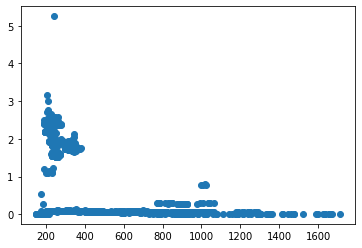

In [18]:
sample = pd.concat([pd.DataFrame(lumber_df['Adj_close']),pd.DataFrame(rates_dict[rate]['Rate (%)'])],axis=1).dropna()
plt.scatter(x=sample['Adj_close'],y=sample['Rate (%)']);

### Correlation using pct changes for Lumber

In [19]:
for rate in rates_dict.keys():
    print(rate,round(((pd.concat([pd.DataFrame(lumber_df['Adj_close'].pct_change(-1)),pd.DataFrame(rates_dict[rate]['Rate (%)'])],axis=1).dropna().corr()).iloc[0][1]*100),2))

EFFR -2.88
OBFR -4.57
TGCR -5.54
BGCR -5.54
SOFR -5.51


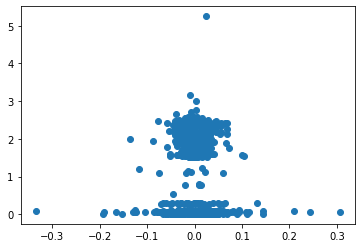

In [20]:
sample = pd.concat([pd.DataFrame(lumber_df['Adj_close'].pct_change(-1)),pd.DataFrame(rates_dict[rate]['Rate (%)'])],axis=1).dropna()
plt.scatter(x=sample['Adj_close'],y=sample['Rate (%)']);

#### Spreaman correlation - on pct changes as these tests to do not depend on any underlying assumption of normality which if breaks if you use pct change (percentages are bounded by [0, 1])

In [21]:
for rate in rates_dict.keys():
    print(rate,":",spearmanr(pd.concat([pd.DataFrame(lumber_df['Adj_close'].pct_change(-1)),pd.DataFrame(rates_dict[rate]['Rate (%)'])],axis=1).dropna()))

EFFR : SpearmanrResult(correlation=-0.04446111375836081, pvalue=0.0010144577044086452)
OBFR : SpearmanrResult(correlation=-0.07947842857352735, pvalue=0.0017331805071343967)
TGCR : SpearmanrResult(correlation=-0.08668849920027069, pvalue=0.0054141616290987425)
BGCR : SpearmanrResult(correlation=-0.08671673488427667, pvalue=0.005399014005232176)
SOFR : SpearmanrResult(correlation=-0.08167705344472402, pvalue=0.008794062622879713)


# Realtor Data https://www.realtor.com/research/data/

### Weekly Realtor

In [62]:
weekly_realtor_link = 'https://econdata.s3-us-west-2.amazonaws.com/Reports/Core/listing_weekly_core_aggregate_by_country.csv'
weekly_realtor = pd.read_csv(weekly_realtor_link)
weekly_realtor.index = pd.DatetimeIndex(weekly_realtor['week_end_date'])
weekly_realtor.drop(['week_end_date'], axis=1, inplace=True)
weekly_realtor.drop(['geo_country'], axis=1, inplace=True)
weekly_realtor.index.name = 'dt'

# Convert strings to numeric values and remove % from cells
for col in weekly_realtor.columns:
    try:
        weekly_realtor[col] = weekly_realtor[col].apply(lambda x: x.replace('%',''))
        weekly_realtor[col] = pd.to_numeric(weekly_realtor[col], errors='coerce')
    except:
        weekly_realtor[col] = pd.to_numeric(weekly_realtor[col], errors='coerce')

# Add % to column headers
weekly_realtor.columns = ['{}{}'.format(c, '' if c in ['median_days_on_market_by_day_yy'] else ' (%)') for c in weekly_realtor.columns]

weekly_realtor.head(1).append(weekly_realtor.tail(1))

,median_listing_price_yy (%),active_listing_count_yy (%),median_days_on_market_by_day_yy,median_days_on_market_yy (%),new_listing_count_yy (%),new_listing_share_yy (%),price_reduced_count_yy (%),price_reduced_share_yy (%)
dt,,,,,,,,
2022-05-21,16.6,8.6,-6,-16.7,6.3,0.9,71.9,1.6
2017-07-01,8.1,-10.6,-4,-6.0,0.4,0.5,3.3,0.6


### correlation with Weekly_Realtors Data -  weekly and starts only from 2017
> A

#### Pearson correlation btw (1) weekly realtor data filled for daily data & (2) daily Lumber prices

In [64]:
# Resample Weekly Data to Daily
weekly_realtor = pd.DataFrame(data=weekly_realtor).set_index(weekly_realtor.index).resample('D').ffill().sort_index(ascending=False)

# notice above we did ffill but now we also doing bfill
for col in weekly_realtor.columns:
    print(col,":",round(((pd.concat([lumber_df['Adj_close'], pd.DataFrame(index=lumber_df.index,data=weekly_realtor[col]).bfill()],axis=1).dropna().corr()).iloc[0][1]*100),2))


median_listing_price_yy (%) : 76.95
active_listing_count_yy (%) : -65.8
median_days_on_market_by_day_yy : -71.86
median_days_on_market_yy (%) : -73.53
new_listing_count_yy (%) : 17.35
new_listing_share_yy (%) : 63.58
price_reduced_count_yy (%) : -39.44
price_reduced_share_yy (%) : -16.79


## Pearson correlation btw (1) weekly realtor data filled for daily data & (2) daily Lumber prices % change

In [24]:
# notice above we did ffill but now we also doing bfill
for col in weekly_realtor.columns:
    print(col,":",round(((pd.concat([lumber_df['Adj_close'].pct_change(-1), pd.DataFrame(index=lumber_df.index,data=weekly_realtor[col]).bfill()],axis=1).dropna().corr()).iloc[0][1]*100),2))


median_listing_price_yy (%) : 3.09
active_listing_count_yy (%) : -3.66
median_days_on_market_by_day_yy : 4.83
median_days_on_market_yy (%) : 4.8
new_listing_count_yy (%) : 0.17
new_listing_share_yy (%) : 0.86
price_reduced_count_yy (%) : -2.86
price_reduced_share_yy (%) : -1.76


In [25]:
weekly_sat_resampled_lumber = pd.DataFrame(index= pd.DatetimeIndex(lumber_df.index),data= lumber_df.values, columns=lumber_df.columns ).resample('W-SAT').mean()
weekly_sat_resampled_lumber.head(1).append(weekly_sat_resampled_lumber.tail(1))

,close,Adj_close,open,Adj_open,high,Adj_high,low,Adj_low,volume,openInterest
dt,,,,,,,,,,
1969-10-04,80.166667,17348.436923,79.416667,17186.133459,80.25,17366.470641,79.166667,17132.032305,0.0,0.0
2022-05-14,1015.500000,1015.500000,1004.050000,1004.050000,1020.00,1020.000000,991.500000,991.500000,71.0,81.5


In [ ]:
# delete

## Spearman Rank correlation resampled (to weekly) Lumber prices pct changes and weekly realtor data

In [26]:
weekly_realtor_spr = pd.DataFrame(columns=['Item','Spearman','p-value'])
for col in weekly_realtor.columns:
    spr = spearmanr(pd.concat([weekly_realtor[col],weekly_sat_resampled_lumber['Adj_close'].pct_change(1)],axis=1).dropna())
    item_df = pd.DataFrame(data=[col, round(spr[0],2), round(spr[1],3)]).T
    item_df.columns = weekly_realtor_spr.columns
    weekly_realtor_spr = pd.concat([item_df,weekly_realtor_spr],axis=0)
weekly_realtor_spr.sort_values(by='Spearman',ascending=False)

,Item,Spearman,p-value
0,median_listing_price_yy (%),0.11,0.079
0,new_listing_share_yy (%),0.08,0.23
0,median_days_on_market_yy (%),0.0,0.969
0,median_days_on_market_by_day_yy,-0.03,0.659
0,new_listing_count_yy (%),-0.05,0.433
0,price_reduced_share_yy (%),-0.09,0.152
0,price_reduced_count_yy (%),-0.12,0.051
0,active_listing_count_yy (%),-0.14,0.027


## Spearman Rank correlation resampled (to weekly) Lumber prices and weekly realtor data

In [27]:
weekly_realtor_spr = pd.DataFrame(columns=['Item','Spearman','p-value'])
for col in weekly_realtor.columns:
    item_df = pd.DataFrame(data=[col, round(spr[0],2), round(spr[1],4)]).T
    item_df.columns = weekly_realtor_spr.columns
    spr = spearmanr(pd.concat([weekly_realtor[col],weekly_sat_resampled_lumber['Adj_close']],axis=1).dropna())
    weekly_realtor_spr = pd.concat([item_df,weekly_realtor_spr],axis=0)
weekly_realtor_spr.sort_values(by='Spearman',ascending=False)

,Item,Spearman,p-value
0,active_listing_count_yy (%),0.73,0.0
0,price_reduced_count_yy (%),0.7,0.0
0,new_listing_share_yy (%),0.08,0.1802
0,median_listing_price_yy (%),-0.09,0.1518
0,price_reduced_share_yy (%),-0.34,0.0
0,median_days_on_market_by_day_yy,-0.6,0.0
0,median_days_on_market_yy (%),-0.72,0.0
0,new_listing_count_yy (%),-0.75,0.0


## Monthly Realtor

In [28]:
current_monthly_realtor_link = 'https://econdata.s3-us-west-2.amazonaws.com/Reports/Core/RDC_Inventory_Core_Metrics_Country.csv'
history_monthly_realtor_link = 'https://econdata.s3-us-west-2.amazonaws.com/Reports/Core/RDC_Inventory_Core_Metrics_Country_History.csv'

monthly_realtor = pd.concat([pd.read_csv(current_monthly_realtor_link,on_bad_lines='skip'),pd.read_csv(history_monthly_realtor_link,on_bad_lines='skip')],axis=0)
monthly_realtor.drop_duplicates(inplace=True)
monthly_realtor.index = pd.to_datetime(monthly_realtor['month_date_yyyymm'], format='%Y%m', errors='coerce')
monthly_realtor.drop(['month_date_yyyymm'], axis=1, inplace=True)
monthly_realtor.index.name = 'dt'
monthly_realtor = monthly_realtor[monthly_realtor.index.notnull()]
monthly_realtor.drop(['country','quality_flag'], axis=1, inplace=True)

# Resample Monthly Data to Daily - don't resample data in the database but do cell formats like cleaning %, changing column names etc. 
monthly_realtor = pd.DataFrame(data=monthly_realtor).set_index(monthly_realtor.index).resample('D').ffill().sort_index(ascending=False)

monthly_realtor.head(1).append(monthly_realtor.tail(1))

,median_listing_price,median_listing_price_mm,median_listing_price_yy,active_listing_count,active_listing_count_mm,active_listing_count_yy,median_days_on_market,median_days_on_market_mm,median_days_on_market_yy,new_listing_count,...,median_square_feet_yy,average_listing_price,average_listing_price_mm,average_listing_price_yy,total_listing_count,total_listing_count_mm,total_listing_count_yy,pending_ratio,pending_ratio_mm,pending_ratio_yy
dt,,,,,,,,,,,,,,,,,,,,,
2022-04-01,425000.0,0.0495,0.1421,409473.0,0.0721,-0.1212,34.0,-0.0933,-0.15,491936.0,...,-0.0019,815542.0,0.0048,0.1115,1008140.0,0.0674,-0.1013,1.4594,-0.014,0.0551
2016-07-01,259840.0,NaN,NaN,1549830.0,NaN,NaN,69.0,NaN,NaN,504200.0,...,NaN,445463.0,NaN,NaN,1970031.0,NaN,NaN,0.2711,NaN,NaN


## Pearson correlation with btw (1) monthly realtor data filled for daily data & (2) daily Lumber prices

In [29]:
monthly_realtor_lumber_dict = {}
for col in monthly_realtor.columns:
   monthly_realtor_lumber_dict[col] = round(pd.concat([lumber_df['Adj_close'], pd.DataFrame(index=lumber_df.index,data=monthly_realtor[col]).bfill()],axis=1).dropna().corr().iloc[0][1]*100,2)

# showing only correlation with 75% and above
for key in monthly_realtor_lumber_dict.keys():
    if(abs(monthly_realtor_lumber_dict[key]) > 75):
        print(key, monthly_realtor_lumber_dict[key])

median_listing_price 77.46
median_listing_price_yy 77.37
active_listing_count -84.25
median_days_on_market_yy -75.71
median_listing_price_per_square_foot 82.67
median_listing_price_per_square_foot_yy 84.53
median_square_feet -77.26
average_listing_price 85.87
total_listing_count -79.98
pending_ratio 90.57


## Spearman correlation with resampled Lumber percentage change

In [30]:
monthly_realtor_spr = pd.DataFrame(columns=['Item','Spearman','p-value'])
for col in monthly_realtor.columns:
    item_df = pd.DataFrame(data=[col, round(spr[0],2), round(spr[1],3)]).T
    item_df.columns = monthly_realtor_spr.columns
    spr = spearmanr(pd.concat([monthly_realtor[col],monthly_resampled_lumber['Adj_close'].pct_change(1)],axis=1).dropna())
    monthly_realtor_spr = pd.concat([item_df,monthly_realtor_spr],axis=0)
monthly_realtor_spr.sort_values(by='Spearman',ascending=False)

,Item,Spearman,p-value
0,pending_ratio_yy,0.47,0.0
0,price_increased_count_yy,0.47,0.0
0,average_listing_price_yy,0.45,0.0
0,price_reduced_count,0.32,0.015
0,total_listing_count,0.31,0.018
0,active_listing_count,0.3,0.024
0,median_listing_price_per_square_foot,0.23,0.082
0,median_listing_price_per_square_foot_yy,0.22,0.1
0,pending_ratio_mm,0.2,0.102
0,median_square_feet,0.19,0.144


### GSCPI Index - from newyorkfed

In [31]:
GSCPI_link = 'https://www.newyorkfed.org/medialibrary/research/interactives/gscpi/downloads/gscpi_data.xlsx'
GSCPI = pd.read_excel(GSCPI_link, sheet_name='GSCPI Monthly Data',skiprows=4)
GSCPI.set_index('Unnamed: 0', inplace=True)
GSCPI.index = pd.DatetimeIndex(GSCPI.index)
GSCPI.index.name = 'Date'
GSCPI = GSCPI.drop(['Unnamed: 2','Unnamed: 3'], axis=1)
GSCPI.columns = ['GSCPI']
GSCPI.head(1).append(GSCPI.tail(1))

,GSCPI
Date,
1998-01-31,-0.944747
2022-04-30,3.288267


In [32]:
GSCPI_Lumber_pct = pd.concat([GSCPI['GSCPI'].pct_change(1),monthly_resampled_lumber_end['Adj_close'].pct_change(1)],axis=1).dropna()
GSCPI_Lumber = pd.concat([GSCPI['GSCPI'],monthly_resampled_lumber_end['Adj_close']],axis=1).dropna()

In [33]:
spearmanr(GSCPI_Lumber)

SpearmanrResult(correlation=-0.1223482732476902, pvalue=0.036655804649419026)

In [34]:
spearmanr(GSCPI_Lumber_pct)

SpearmanrResult(correlation=-0.01803076713302719, pvalue=0.7593892567177043)

In [35]:
GSCPI_Lumber.corr()

,GSCPI,Adj_close
GSCPI,1.000000,-0.150135
Adj_close,-0.150135,1.000000


In [36]:
GSCPI_Lumber_pct.corr()

,GSCPI,Adj_close
GSCPI,1.00000,0.03973
Adj_close,0.03973,1.00000


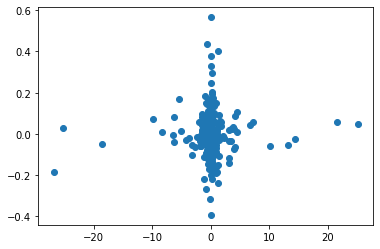

In [37]:
plt.scatter(GSCPI_Lumber_pct.iloc[:,0],GSCPI_Lumber_pct.iloc[:,1]);

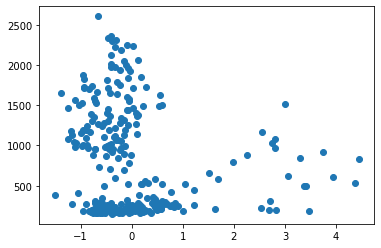

In [38]:
plt.scatter(GSCPI_Lumber.iloc[:,0],GSCPI_Lumber.iloc[:,1]);

# Weekly Economic Index (WEI)

In [39]:
WEI_LINK = "https://www.newyorkfed.org/medialibrary/research/interactives/wei/downloads/weekly-economic-index_data.xlsx"
WEI = pd.read_excel(WEI_LINK, sheet_name='2008-current',skiprows=4)
WEI.set_index('Date', inplace=True)
WEI.index = pd.DatetimeIndex(WEI.index)
WEI = WEI.iloc[: , :1] # Keep only 1st column
WEI.head(1).append(WEI.tail(1))

,WEI
Date,
2008-01-05,1.60
2022-05-21,3.52


In [40]:
WEI_Lumber_pct = pd.concat([WEI['WEI'].pct_change(1),weekly_sat_resampled_lumber['Adj_close'].pct_change(1)],axis=1).dropna()
WEI_Lumber = pd.concat([WEI['WEI'],weekly_sat_resampled_lumber['Adj_close']],axis=1).dropna()

In [41]:
spearmanr(WEI_Lumber)

SpearmanrResult(correlation=0.08040595933690424, pvalue=0.027672297194632857)

In [42]:
spearmanr(WEI_Lumber_pct)

SpearmanrResult(correlation=-0.04173487736575065, pvalue=0.25395987828429173)

In [43]:
WEI_Lumber.corr()

,WEI,Adj_close
WEI,1.000000,0.351296
Adj_close,0.351296,1.000000


In [44]:
WEI_Lumber_pct.corr()

,WEI,Adj_close
WEI,1.000000,-0.031782
Adj_close,-0.031782,1.000000


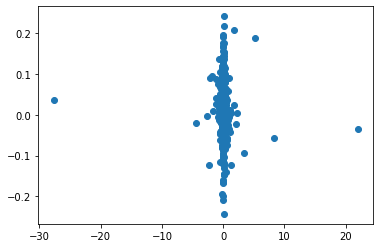

In [45]:
plt.scatter(WEI_Lumber_pct.iloc[:,0],WEI_Lumber_pct.iloc[:,1]);

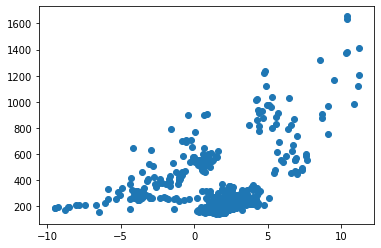

In [46]:
plt.scatter(WEI_Lumber.iloc[:,0],WEI_Lumber.iloc[:,1]);


# Yield Curve https://www.newyorkfed.org/research/capital_markets/ycfaq#/interactive
#### MONTHLY

In [47]:
Y_curve_link = "https://www.newyorkfed.org/medialibrary/media/research/capital_markets/allmonth.xls"
Y_curve = pd.read_excel(Y_curve_link, sheet_name='rec_prob', index_col=0)
Y_curve = Y_curve.iloc[:, :4]
Y_curve.index = pd.DatetimeIndex(Y_curve.index)
Y_curve.dropna(inplace=True)
Y_curve.head(1).append(Y_curve.tail(1))

,10 Year Treasury Yield,3 Month Treasury Yield,3 Month Treasury Yield (Bond Equivalent Basis),Spread
Date,,,,
1959-01-31,4.02,2.82,2.879694,1.140306
2022-04-30,2.75,0.76,0.772039,1.977961


In [48]:
Y_curve_Lumber_pct = pd.concat([Y_curve['3 Month Treasury Yield'].pct_change(1),monthly_resampled_lumber_end['Adj_close'].pct_change(1)],axis=1).dropna()
Y_curve_Lumber = pd.concat([Y_curve['3 Month Treasury Yield'],monthly_resampled_lumber_end['Adj_close']],axis=1).dropna()

In [49]:
spearmanr(Y_curve_Lumber_pct)

SpearmanrResult(correlation=0.02564356961005219, pvalue=0.5249159511672663)

In [50]:
spearmanr(Y_curve_Lumber)

SpearmanrResult(correlation=0.761201194014494, pvalue=5.861800338617071e-118)

In [51]:
Y_curve_Lumber_pct.corr()

,3 Month Treasury Yield,Adj_close
3 Month Treasury Yield,1.00000,-0.02262
Adj_close,-0.02262,1.00000


In [52]:
Y_curve_Lumber.corr()

,3 Month Treasury Yield,Adj_close
3 Month Treasury Yield,1.000000,0.538899
Adj_close,0.538899,1.000000


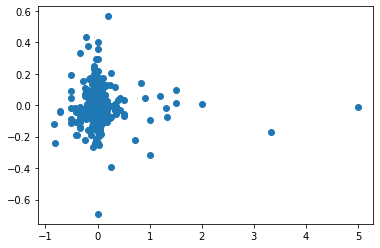

In [53]:
plt.scatter(Y_curve_Lumber_pct.iloc[:,0],Y_curve_Lumber_pct.iloc[:,1]);

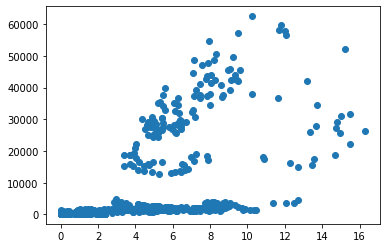

In [54]:
plt.scatter(Y_curve_Lumber.iloc[:,0],Y_curve_Lumber.iloc[:,1]);

## Treasury Term Premia https://www.newyorkfed.org/research/data_indicators/term-premia-tabs#/interactive
### Daily

In [55]:
Treasury_Terms_link = "https://www.newyorkfed.org/medialibrary/media/research/data_indicators/ACMTermPremium.xls"
Treasury_Terms = pd.read_excel(Treasury_Terms_link, sheet_name='ACM Daily', index_col=0)
Treasury_Terms.index = pd.DatetimeIndex(Treasury_Terms.index).strftime('%Y-%m-%d')
Treasury_Terms.dropna(inplace=True)
Treasury_Terms.head(1).append(Treasury_Terms.tail(1))

,ACMY01,ACMY02,ACMY03,ACMY04,ACMY05,ACMY06,ACMY07,ACMY08,ACMY09,ACMY10,...,ACMRNY01,ACMRNY02,ACMRNY03,ACMRNY04,ACMRNY05,ACMRNY06,ACMRNY07,ACMRNY08,ACMRNY09,ACMRNY10
DATE,,,,,,,,,,,,,,,,,,,,,
1961-06-14,2.971938,3.367541,3.551806,3.645017,3.698256,3.733251,3.759322,3.780423,3.798112,3.812862,...,2.887227,3.203769,3.354051,3.435292,3.484541,3.517325,3.540695,3.558119,3.571458,3.581798
2022-05-27,2.008481,2.466555,2.640965,2.709501,2.739220,2.755113,2.766281,2.775781,2.784351,2.791844,...,1.951200,2.400494,2.621717,2.750762,2.837178,2.901415,2.952692,2.995532,3.032351,3.064564


In [56]:
Treasury_Terms_Lumber_pct = pd.concat([Treasury_Terms['ACMY01'].pct_change(1),lumber_df['Adj_close'].pct_change(-1)],axis=1).dropna()
Treasury_Terms_Lumber = pd.concat([Treasury_Terms['ACMY01'],lumber_df['Adj_close']],axis=1).dropna()

## Spearman - without pct_change

In [57]:
Treasury_Terms_spr = pd.DataFrame(columns=['Item','Spearman','p-value'])
for col in Treasury_Terms.columns:
    Treasury_Terms_Lumber_pct = pd.concat([Treasury_Terms[col].pct_change(1),lumber_df['Adj_close'].pct_change(-1)],axis=1).dropna()
    Treasury_Terms_Lumber = pd.concat([Treasury_Terms[col],lumber_df['Adj_close']],axis=1).dropna()
    item_df = pd.DataFrame(data=[col, round(spearmanr(Treasury_Terms_Lumber)[0],2), round(spearmanr(Treasury_Terms_Lumber)[1],3)]).T
    item_df.columns = Treasury_Terms_spr.columns
    Treasury_Terms_spr = pd.concat([item_df,Treasury_Terms_spr],axis=0)

Treasury_Terms_spr.sort_values(by='Spearman',ascending=False).head(2)

,Item,Spearman,p-value
0,ACMRNY10,0.78,0.0
0,ACMRNY08,0.78,0.0


## Spearman - pct_change

In [58]:
Treasury_Terms_spr = pd.DataFrame(columns=['Item','Spearman','p-value'])
for col in Treasury_Terms.columns:
    Treasury_Terms_Lumber_pct = pd.concat([Treasury_Terms[col].pct_change(1),lumber_df['Adj_close'].pct_change(-1)],axis=1).dropna()
    Treasury_Terms_Lumber = pd.concat([Treasury_Terms[col],lumber_df['Adj_close']],axis=1).dropna()
    item_df = pd.DataFrame(data=[col, round(spearmanr(Treasury_Terms_Lumber_pct)[0],2), round(spearmanr(Treasury_Terms_Lumber_pct)[1],3)]).T
    item_df.columns = Treasury_Terms_spr.columns
    Treasury_Terms_spr = pd.concat([item_df,Treasury_Terms_spr],axis=0)

Treasury_Terms_spr.sort_values(by='Spearman',ascending=False).head(2)

,Item,Spearman,p-value
0,ACMY03,-0.0,0.745
0,ACMY04,-0.0,0.746


# Pearson 

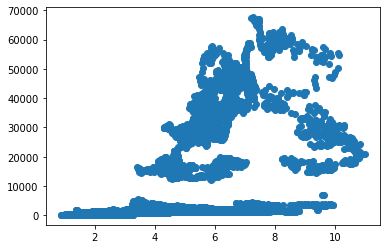

In [59]:
Treasury_Terms_Lumber = pd.concat([Treasury_Terms['ACMRNY10'],lumber_df['Adj_close']],axis=1).dropna()
plt.scatter(Treasury_Terms_Lumber.iloc[:,0],Treasury_Terms_Lumber.iloc[:,1]);

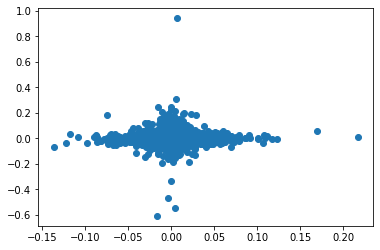

In [60]:
Treasury_Terms_Lumber_pct = pd.concat([Treasury_Terms['ACMRNY10'].pct_change(1),lumber_df['Adj_close'].pct_change(-1)],axis=1).dropna()
plt.scatter(Treasury_Terms_Lumber_pct.iloc[:,0],Treasury_Terms_Lumber_pct.iloc[:,1]);

# FRED

In [61]:
from _fred import FRED_Client, FRED_SYMBOLS
fred = FRED_Client(FRED_SYMBOLS)
fred_data = fred.get_data(100)
fred_desc = fred.get_symbol_description()

Time Taken 00:09


ValueError: Too Many Requests.  Exceeded Rate Limit

#### LIST of All FRED Symbols

In [ ]:
fred_data.keys()

### List of Fred symbols based on frequency

In [ ]:
frequency_count = fred_desc.loc[['id','frequency']].T.groupby('frequency').count()
frequency_count

### ALL META DATA FOR fred symbols

In [ ]:
fred_desc.index

In [ ]:
fred_desc.loc[['id','title']]['TEDRATE']['title']

In [ ]:
import collections
fred_daily_syms = []
error_syms = []

frequency_count = fred_desc.loc[['id','frequency']].T.groupby('frequency').count()
fred_frquency_sym = collections.defaultdict(list)

for key in frequency_count.index:
    # print(key)
    for syms in fred_data.keys():
        # print(syms)
        try:
            if(fred_desc[syms]['frequency'] == key):
                fred_frquency_sym[key].append(syms)
        except:
            error_syms.append(syms)

fred_db_tables = collections.defaultdict(list)
for key in fred_frquency_sym.keys():
    fred_db_tables[key] =pd.DataFrame()
    for sym in fred_frquency_sym[key]:
        fred_db_tables[key] = pd.concat([fred_db_tables[key],fred_data[sym]],axis=1)
    
    fred_db_tables[key].index = pd.DatetimeIndex(fred_db_tables[key].index).strftime('%Y-%m-%d')
    fred_db_tables[key] = fred_db_tables[key].dropna(how='all').sort_index(ascending = False)
    
fred_db_tables['Daily'].drop('TEDRATE',axis=1, inplace = True) # Removed TEDRATE from symbols with daily frequency as its 'last_updated' field in fred_desc was not updated for a long time


## Rename All columns to original Names


In [ ]:

for key in fred_db_tables.keys():
    col_list = []
    for col in fred_db_tables[key].columns:
        col_list.append(fred_desc.loc[['id','title']][col]['title'])
    fred_db_tables[key].columns = col_list

In [ ]:
fred_db_tables['Daily'].head(1).append(fred_db_tables['Daily'].tail(1))

In [ ]:
fred_db_tables['Monthly'].head(1).append(fred_db_tables['Monthly'].tail(1))

In [ ]:
fred_db_tables['Weekly, Ending Monday'].head(1).append(fred_db_tables['Weekly, Ending Monday'].tail(1))

# Lumber correlations with Daily FRED Data

In [ ]:
# Daily Correlations of Lumber with Fred Variables
fred_corr = pd.DataFrame(columns=['Item','Spearman','p-value','Pearson'])
for col in fred_db_tables['Daily'].columns:
    fred_daily_Lumber_pct = pd.concat([fred_db_tables['Daily'][col].pct_change(-1),lumber_df['Adj_close'].pct_change(-1)],axis=1).dropna()
    fred_daily_Lumber = pd.concat([fred_db_tables['Daily'][col],lumber_df['Adj_close']],axis=1).dropna()
    spr = spearmanr(fred_daily_Lumber)
    item_df = pd.DataFrame(data=[col, round(spr[0],2), round(spr[1],3), round(fred_daily_Lumber.corr().iloc[0,1],2)]).T
    item_df.columns = fred_corr.columns
    fred_corr = pd.concat([item_df,fred_corr],axis=0)

fred_corr.sort_values(by='Spearman',ascending=False)

In [ ]:
# Daily Correlations of Lumber_pct_change with Fred Variables_pct_change
fred_corr = pd.DataFrame(columns=['Item','Spearman','p-value','Pearson'])
for col in fred_db_tables['Daily'].columns:
    fred_daily_Lumber_pct = pd.concat([fred_db_tables['Daily'][col].pct_change(-1),lumber_df['Adj_close'].pct_change(-1)],axis=1).dropna()
    fred_daily_Lumber = pd.concat([fred_db_tables['Daily'][col],lumber_df['Adj_close']],axis=1).dropna()
    spr = spearmanr(fred_daily_Lumber_pct)
    item_df = pd.DataFrame(data=[col, round(spr[0],2), round(spr[1],3), round(fred_daily_Lumber_pct.corr().iloc[0,1],2)]).T
    item_df.columns = fred_corr.columns
    fred_corr = pd.concat([item_df,fred_corr],axis=0)

fred_corr.sort_values(by='Spearman',ascending=False)

# YAHOO - 
### I used ".get_data" function from "_yahoo.py" to pull OHLCV & Adj Close for all symbols. I named it "yahoo_get_data" in yahoo section of "DATA_Aggregation.ipynb. All symbols (6 series for each) need to go in db. 

In [ ]:
from _yahoo import YAHOO_Client, YAHOO_SYMBOLS
yahoo = YAHOO_Client(YAHOO_SYMBOLS)
yahoo_desc = yahoo.get_symbol_description()
yahoo_get_data = yahoo.get_data(35) 

# Instead of symbols, use short names for companies
com_list = ['RFP','WFG','IFP.TO','WY','CFP.TO']
for key in list(yahoo_get_data):
    if key in com_list:
        new_key = yahoo_desc[key]['shortName']
        yahoo_get_data[new_key] = yahoo_get_data.pop(key)

for new_key in yahoo_get_data.keys():
    yahoo_get_data[new_key].index = pd.DatetimeIndex(yahoo_get_data[new_key].index).strftime('%Y-%m-%d')

# yahoo_get_data is ready to be inserted into the Database - note yahoo_desc - shortnames have been added as keys to yahoo_get_data

In [ ]:
yahoo_get_data['INTERFOR CORPORATION'].head(1).append(yahoo_get_data['INTERFOR CORPORATION'].tail(1))

## Correlation for Yahoo symbols

In [ ]:
data_close_yahoo = yahoo.get_combined_yahoo(OHLCV = 'Close') # This is Not for the Database

In [ ]:
# Daily Correlations of Lumber_pct_change with Yahoo Variables_pct_change
yahoo_corr = pd.DataFrame(columns=['Item','Spearman','p-value','Pearson'])


for col in data_close_yahoo.columns:
    if col not in ['LBS=F']:
        data_close_yahoo[col].index = pd.DatetimeIndex(data_close_yahoo[col].index).strftime('%Y-%m-%d')
        yahoo_Lumber_pct = pd.concat([data_close_yahoo[col].pct_change(1),lumber_df['Adj_close'].pct_change(1)],axis=1).dropna()
        yahoo_Lumber = pd.concat([data_close_yahoo[col],lumber_df['Adj_close']],axis=1).dropna()
        spr = spearmanr(yahoo_Lumber_pct)
        item_df = pd.DataFrame(data=[col, round(spr[0],2), round(spr[1],3), round(yahoo_Lumber_pct.corr().iloc[0,1],2)]).T
        item_df.columns = yahoo_corr.columns
        yahoo_corr = pd.concat([item_df,yahoo_corr],axis=0)

yahoo_corr.sort_values(by='Spearman',ascending=False)

In [ ]:
# Daily Correlations of Lumber_pct_change with Yahoo Variables
yahoo_corr = pd.DataFrame(columns=['Item','Spearman','p-value','Pearson'])


for col in data_close_yahoo.columns:
    if col not in ['LBS=F']:
        data_close_yahoo[col].index = pd.DatetimeIndex(data_close_yahoo[col].index).strftime('%Y-%m-%d')
        yahoo_Lumber_pct = pd.concat([data_close_yahoo[col],lumber_df['Adj_close']],axis=1).dropna()
        yahoo_Lumber = pd.concat([data_close_yahoo[col],lumber_df['Adj_close']],axis=1).dropna()
        spr = spearmanr(yahoo_Lumber_pct)
        item_df = pd.DataFrame(data=[col, round(spr[0],2), round(spr[1],3), round(yahoo_Lumber_pct.corr().iloc[0,1],2)]).T
        item_df.columns = yahoo_corr.columns
        yahoo_corr = pd.concat([item_df,yahoo_corr],axis=0)

yahoo_corr.sort_values(by='Spearman',ascending=False)

# US Census Monthly Reports
1. Monthly Wholesale Trade: Sales and Inventories
2. New Residential Construction
3. New Home Sales
4. Construction Spending

In [ ]:
from _censusUS import *
new_residential_construction = CensusEconomicIndicators(category_codes_reversed_construction_spending, data_type_codes_reversed_construction_spending, filter_list_construction_spending, time_text, params, 'New Residential Construction')
new_residential_construction_df = new_residential_construction.aggregate_timeseries_without_labels()
new_residential_construction_to_keep = [ x for x in list(new_residential_construction_df.columns) if "_E_" not in x ]
new_residential_construction_df = new_residential_construction_df[new_residential_construction_to_keep]
new_residential_construction_df.head(1).append(new_residential_construction_df.tail(1))

In [ ]:
monthly_resampled_lumber

In [ ]:
construct_spend = CensusEconomicIndicators(category_codes_reversed_construction_spending, data_type_codes_reversed_construction_spending, filter_list_construction_spending, time_text, params, 'Construction Spending')
construct_spend_df = construct_spend.aggregate_timeseries()
construct_spend_df.head(1).append(construct_spend_df.tail(1))


In [ ]:
new_home_sales = CensusEconomicIndicators(category_codes_reversed_construction_spending, data_type_codes_reversed_construction_spending, filter_list_construction_spending, time_text, params, 'New Home Sales')
new_home_sales_df = new_home_sales.aggregate_timeseries_without_labels()
new_home_sales_to_keep = [ x for x in list(new_home_sales_df.columns) if "_E_" not in x ]
new_home_sales_df = new_home_sales_df[new_home_sales_to_keep]
new_home_sales_df.head(1).append(new_home_sales_df.tail(1))

In [ ]:
monthly_wholesale_trade = CensusEconomicIndicators(category_codes_reversed_construction_spending, data_type_codes_reversed_construction_spending, filter_list_construction_spending, time_text, params, 'Monthly Wholesale Trade: Sales and Inventories')
monthly_wholesale_trade_df = monthly_wholesale_trade.aggregate_timeseries_without_labels()
monthly_wholesale_trade_to_keep = [ x for x in list(monthly_wholesale_trade_df.columns) if "_E_" not in x ]
monthly_wholesale_trade_df = monthly_wholesale_trade_df[monthly_wholesale_trade_to_keep]
codes_to_include = ['4232_IM','4232_SM','4233_IM','4233_SM']
monthly_wholesale_trade_to_keep = [ x for x in list(monthly_wholesale_trade_df.columns) if x in codes_to_include ]
monthly_wholesale_trade_df = monthly_wholesale_trade_df[monthly_wholesale_trade_to_keep]
monthly_wholesale_trade_df.columns =  ['Furniture_Inventories_NSA','Furniture_Sales_NSA','Lumber_Inventories_NSA','Lumber_Sales_NSA'] 
monthly_wholesale_trade_df = monthly_wholesale_trade_df.apply(pd.to_numeric)
monthly_wholesale_trade_df.index = pd.to_datetime(monthly_wholesale_trade_df.index).strftime('%Y-%m-%d')
monthly_wholesale_trade_df['Furniture_Sales_By_Inv'] = monthly_wholesale_trade_df['Furniture_Inventories_NSA'].div(monthly_wholesale_trade_df['Furniture_Sales_NSA'])
monthly_wholesale_trade_df['Lumber_Sales_By_Inv'] = monthly_wholesale_trade_df['Lumber_Inventories_NSA'].div(monthly_wholesale_trade_df['Lumber_Sales_NSA'])
monthly_wholesale_trade_df.head(1).append(monthly_wholesale_trade_df.tail(1))

# Railcars data

### CN carloads

In [ ]:
from _railroad import *
cn_carloads = combined_company_railroad_data('CN',20)
cn_carloads['Total Forest Products'] = cn_carloads['Primary Forest Prods'] + cn_carloads['Lumber & Wood Prods'] + cn_carloads['Pulp & Paper Prods']
cn_carloads =  cn_carloads.resample('W-Sat').mean() # Week Starting is Sunday but we moved it to Saturday (end of week) - This also matches CP Data
cn_carloads['Yr'] = cn_carloads.index.year
cn_carloads['Wk'] = cn_carloads.index.week

### CP carloads

In [ ]:
cp_carloads = combined_company_railroad_data('CP',8)
cp_carloads['Total Forest Products'] = cp_carloads['Primary Forest Products'] + cp_carloads['Lumber & Wood Except Furniture'] + cp_carloads['Pulp,Paper & Allied Products']
cp_carloads.index = pd.to_datetime(cp_carloads.index, utc=True)
cp_carloads['Yr'] = cp_carloads.index.year
cp_carloads['Wk'] = cp_carloads.index.week
# Matching CN and CP columns
cp_carloads.columns = cn_carloads.columns
cp_carloads.index =  pd.DatetimeIndex(cp_carloads.index)


### Combined CN & CP data

In [ ]:
# Combining CN & CP Data
# cn_carloads = cn_carloads.tz_convert('UTC')
# cp_carloads = cp_carloads.tz_convert('UTC')
cols = pd.MultiIndex.from_product([['CN','CP'], (cn_carloads.columns)])
combined_carloads = pd.DataFrame(index = cn_carloads.index ,data=pd.concat([cn_carloads, cp_carloads], axis=1))
combined_carloads.columns = cols

for cols in cn_carloads.columns[:-2]:
    combined_carloads.loc[:,('Combined',cols)] = combined_carloads.loc[:, ('CN', cols)].fillna(0) + combined_carloads.loc[:, ('CP', cols)].fillna(0)

combined_carloads


### Correlation of Railroad with Lumber